In [1]:
import pandas as pd

# 크롤링데이터 로드

In [2]:
범죄웹크롤링 = 'C:/Users/COM/Desktop/범죄웹크롤링/'
keywords = ['범죄','이혼','가정폭력','우범']
범죄1=pd.read_csv(범죄웹크롤링+'범죄_1.csv', encoding='cp949')
범죄2=pd.read_csv(범죄웹크롤링+'범죄_2.csv', encoding='cp949')
범죄3=pd.read_csv(범죄웹크롤링+'범죄_3.csv', encoding='cp949')
범죄4=pd.read_csv(범죄웹크롤링+'범죄_4.csv', encoding='cp949')
범죄5=pd.read_csv(범죄웹크롤링+'범죄_5.csv', encoding='cp949')
# 범죄뉴스 = pd.concat([df1,df2,df3,df4,df5])
범죄뉴스 = pd.concat([범죄1,범죄2,범죄3,범죄4,범죄5])
범죄뉴스.reset_index(inplace=True)
범죄뉴스.index

RangeIndex(start=0, stop=77630, step=1)

In [3]:
이혼1=pd.read_csv(범죄웹크롤링+'이혼_1.csv', encoding='cp949')
이혼2=pd.read_csv(범죄웹크롤링+'이혼_2.csv', encoding='cp949')
이혼뉴스 = pd.concat([이혼1,이혼2])
이혼뉴스.reset_index(inplace=True)
이혼뉴스.shape

(26775, 20)

In [4]:
가정폭력뉴스=pd.read_csv(범죄웹크롤링+'가정폭력.csv', encoding='cp949')
가정폭력뉴스.shape

(2984, 19)

In [5]:
우범뉴스=pd.read_csv(범죄웹크롤링+'우범.csv', encoding='cp949')
우범뉴스.shape

(1283, 19)

# 함수

### 함수1: 주어진df에대해 분류의 집합을 구하는 함수

In [6]:
def 사건사고분류(df):
    사건사고분류리스트=[]
    for i in range(3):
        row = '사건/사고 분류'+f'{i+1}'
        사건사고분류리스트 = 사건사고분류리스트+list(set(df[row].dropna().values))
    for i in range(len(사건사고분류리스트)):
        사건사고분류리스트[i] = 사건사고분류리스트[i].strip()
    사건사고분류 = set(사건사고분류리스트)
    return 사건사고분류

def 통합분류(df):
    통합분류리스트=[]
    for i in range(3):
        row = '통합 분류'+f'{i+1}'
        통합분류리스트 = 통합분류리스트+list(set(df[row].dropna().values))
    for i in range(len(통합분류리스트)):
        통합분류리스트[i] = 통합분류리스트[i].strip()
    통합분류 = set(통합분류리스트)
    return 통합분류

### 함수2:
<pre>
#wordfrequencygraph
시리즈를 넣으면 빈도분석그래프를 그리는 함수
#keywordseries2list
시리즈(한elem이 한기사내의 단어string)-->리스트(한단어가 한elem) 즉, token
</pre>
*키워드열 혹은 특성분석열로 그릴 수 있다.

In [9]:
import pandas as pd
import nltk
from konlpy.tag import Komoran
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
komoran = Komoran()
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

C:\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [10]:
def keywordseries2list(series):
    kwlst = list(series)
    wordlist=[]
    for i in range(len(kwlst)):
        wordlist += str(kwlst[i]).split(",")
    print(f'token: wordlist with {len(wordlist)}words')
    return wordlist
    #'float' object has no attribute 'split' : 숫자만 들어있는게 있나봐
def wordfrequencygraph(seriesorlist):
    if type(seriesorlist)==list:
        print('make list to token')
        print(f'token: wordlist with {len(seriesorlist)}words')
        tokens = seriesorlist
    if type(seriesorlist)==pd.core.series.Series:
        print('make series to token')
        tokens = keywordseries2list(seriesorlist)
    vocab = nltk.Text(tokens)
    plt.figure(figsize=(16,4))
    plt.title('빈도분석')
    vocab.plot(50)
    plt.show()

### 함수3 :
<pre>
#필터링키워드를 넣으면 해당뉴스를 반환하는 함수
범죄뉴스(전체데이터프레임)과 필터링할분류(미성년범죄), 필터링시작점(8)을 넣으면 해당뉴스를 반환하는 함수
#df=범죄뉴스, filt='사건/사고 분류'or'통합 분류', k=8, keyword ='미성년범죄'
</pre>

In [12]:
def classifyfilter(df,filt,k,keyword):
    # 특정 사건사고분류가 담긴 인덱스를 가져온다.
    indexlist=[]
    for j in range(3):
        row = filt+f'{j+1}'
        print(row)
        for i in range(len(df)):
            if str(df[row][i])[k:] == keyword:
                #print(str(범죄뉴스['사건/사고 분류1'][i])[8:])
                indexlist.append(i)
    print(f'{len(indexlist)} news filtered')
    #전체데이터프레임에서 조건에 해당하는 뉴스행만 뽑는다.
    return df.loc[df.index.isin(indexlist)==True]

### 함수4: 제목들의 명사리스트를 만드는 함수
<pre>
#분할된 시리즈.tolist()를 반복적으로 읽어 통합된리스트(한word가 한elem)로 만드는 함수
#리스트를 반복해서 건네고 마지막 titlelist를 만든다.
</pre>

In [39]:
import re
#여러개의 읽은 파일들에서  나중에 제목의 명사만 통합할 리스트.
titlenouns=[]
def titlelist2titlenouns(lst):
    for i,elem in enumerate(lst):
        elem = re.sub('[^0-9a-zA-Zㄱ-힗]', ' ', str(elem))
    #리스트의 한elem단위로 토크나이징
    transaction = []
    for n in lst:
        transelem = komoran.nouns(str(n))
        transaction.append(transelem)
    #한글자제거
    fin_lst=[]
    for n in transaction:
        two_lst = []
        for i in n:
            if len(i)<=1:
                pass
            else:
                two_lst.append(i)
        fin_lst.append(two_lst)
    #명사리스트로
    for i in fin_lst:
        for n in i:
            titlenouns.append(n)
    print(f'titlenouns with {len(titlenouns)} words')
    return titlenouns

# 함수사용정리
### 1

In [44]:
# 사건사고분류(범죄뉴스)

In [45]:
# 통합분류(범죄뉴스)

### 2

In [46]:
# #키워드열로 빈도분석
# wordfrequencygraph(범죄뉴스.키워드)
# #특성추출열로 빈도분석
# wordfrequencygraph(범죄뉴스.특성추출)

### 3

In [47]:
# #필터링
# 범죄뉴스_미성년범죄 = classifyfilter(범죄뉴스,'사건/사고 분류',8,'미성년범죄')
# wordfrequencygraph(범죄뉴스_미성년범죄.키워드)
# wordfrequencygraph(범죄뉴스_미성년범죄.특성추출)

### 4

In [48]:
# #제목의 명사로 분석
# titlenouns=[]

In [49]:
# titlenouns = titlelist2titlenouns(범죄3.제목.tolist())

In [50]:
# wordfrequencygraph(titlenouns)

# 빈도분석그래프: '범죄'

In [53]:
# [전체 제목]

In [54]:
titlenouns=[]

In [60]:
titlenouns = titlelist2titlenouns(범죄5.제목.tolist())

titlenouns with 460698 words


make list to token
token: wordlist with 460698words


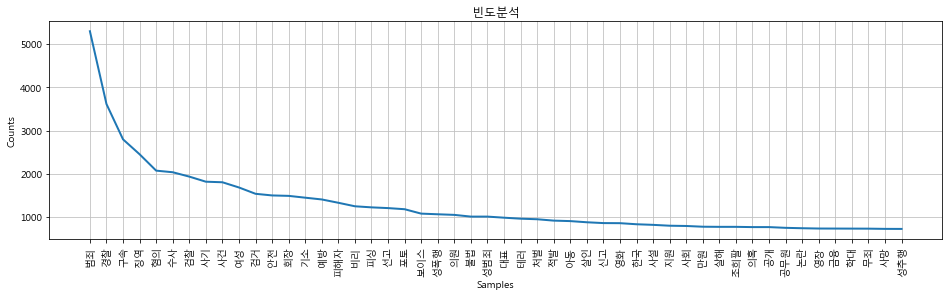

In [61]:
wordfrequencygraph(titlenouns)

In [62]:
# [전체 키워드]

make series to token
token: wordlist with 12178741words


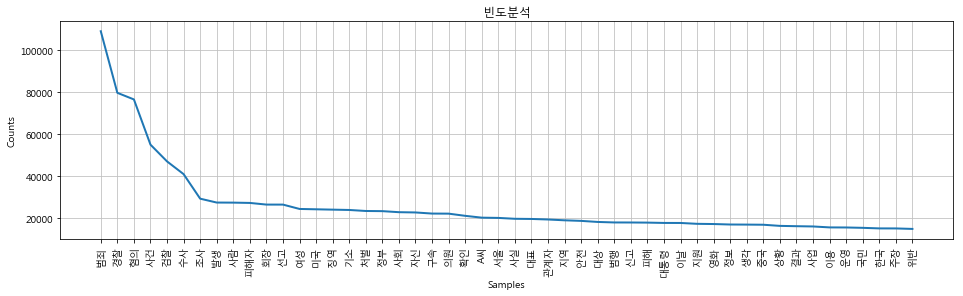

In [63]:
wordfrequencygraph(범죄뉴스.키워드)

In [64]:
# [전체 특성추출]

make series to token
token: wordlist with 1996510words


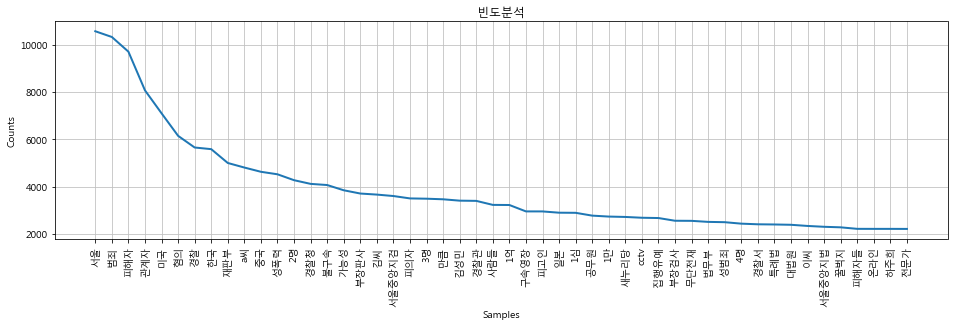

In [65]:
wordfrequencygraph(범죄뉴스.특성추출)

In [ ]:
# [필터링 제목]:미성년범죄

사건/사고 분류1
사건/사고 분류2
사건/사고 분류3
681 news filtered
titlenouns with 3944 words
make list to token
token: wordlist with 3944words


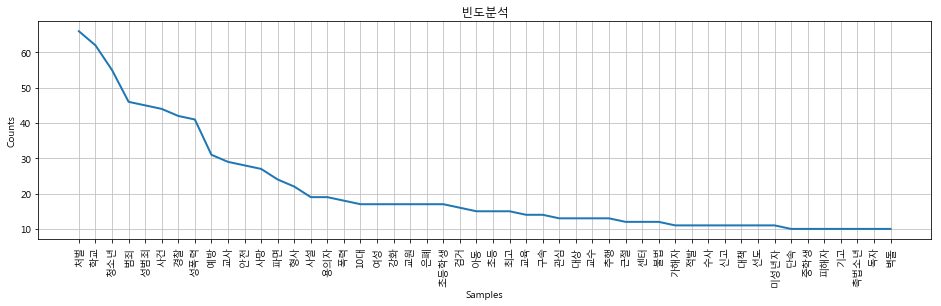

In [67]:
범죄뉴스_미성년범죄 = classifyfilter(범죄뉴스,'사건/사고 분류',8,'미성년범죄')
titlenouns=[]
titlenouns = titlelist2titlenouns(범죄뉴스_미성년범죄.제목.tolist())
wordfrequencygraph(titlenouns)

In [68]:
# [필터링 키워드]

make series to token
token: wordlist with 128270words


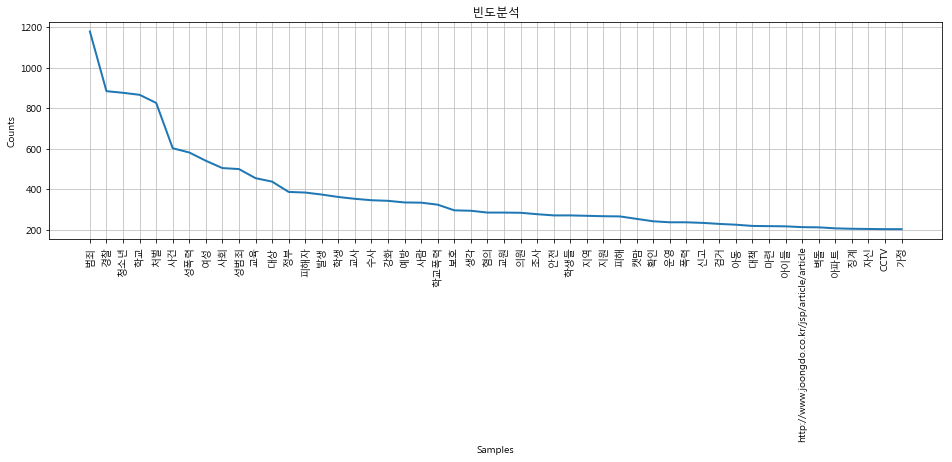

In [69]:
wordfrequencygraph(범죄뉴스_미성년범죄.키워드)

In [70]:
# [필터링 특성추출]

make series to token
token: wordlist with 17308words


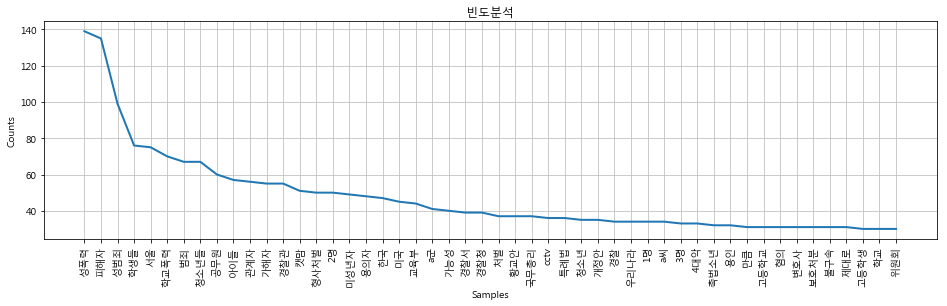

In [71]:
wordfrequencygraph(범죄뉴스_미성년범죄.특성추출)

In [73]:
사건사고분류(범죄뉴스)

{'범죄>기업범죄>거래제한',
 '범죄>기업범죄>계약위반',
 '범죄>기업범죄>내부자거래',
 '범죄>기업범죄>반독점범죄',
 '범죄>기업범죄>횡령',
 '범죄>범죄일반>마약',
 '범죄>범죄일반>방화',
 '범죄>범죄일반>사기',
 '범죄>범죄일반>살인',
 '범죄>범죄일반>유괴/납치',
 '범죄>범죄일반>절도',
 '범죄>범죄일반>폭행',
 '범죄>성범죄>성매매',
 '범죄>성범죄>성추행',
 '범죄>성범죄>성폭행',
 '범죄>성범죄>성희롱',
 '범죄>성범죄>음란물',
 '범죄>정치>뇌물수수',
 '사고>교통사고>노상사고',
 '사고>교통사고>우주사고',
 '사고>교통사고>철도사고',
 '사고>교통사고>항공사고',
 '사고>교통사고>해상사고',
 '사고>산업사고>붕괴',
 '사고>산업사고>원자력사고',
 '사고>산업사고>폭발',
 '사고>산업사고>화재',
 '사회>사회갈등>대량학살',
 '사회>사회갈등>반란_혁명_폭동',
 '사회>사회갈등>시위',
 '사회>사회갈등>전쟁',
 '사회>사회갈등>테러행위',
 '사회>사회문제>노예',
 '사회>사회문제>미성년범죄',
 '사회>사회문제>자살',
 '사회>사회문제>중독',
 '사회>사회문제>학대',
 '재해>자연재해>가뭄',
 '재해>자연재해>눈사태_산사태',
 '재해>자연재해>지진',
 '재해>자연재해>태풍',
 '재해>자연재해>폭염',
 '재해>자연재해>홍수',
 '재해>자연재해>화산폭발'}

In [74]:
통합분류(범죄뉴스)

{'IT_과학>IT_과학일반',
 'IT_과학>과학',
 'IT_과학>모바일',
 'IT_과학>보안',
 'IT_과학>인터넷_SNS',
 'IT_과학>콘텐츠',
 '경제>경제일반',
 '경제>국제경제',
 '경제>금융_재테크',
 '경제>무역',
 '경제>반도체',
 '경제>부동산',
 '경제>산업_기업',
 '경제>서비스_쇼핑',
 '경제>외환',
 '경제>유통',
 '경제>자동차',
 '경제>자원',
 '경제>증권_증시',
 '경제>취업_창업',
 '국제>국제일반',
 '국제>러시아',
 '국제>미국_북미',
 '국제>아시아',
 '국제>유럽_EU',
 '국제>일본',
 '국제>중국',
 '국제>중남미',
 '국제>중동_아프리카',
 '문화>문화일반',
 '문화>미술_건축',
 '문화>방송_연예',
 '문화>생활',
 '문화>영화',
 '문화>요리_여행',
 '문화>음악',
 '문화>전시_공연',
 '문화>종교',
 '문화>출판',
 '문화>학술_문화재',
 '미분류',
 '사회>교육_시험',
 '사회>날씨',
 '사회>노동_복지',
 '사회>미디어',
 '사회>사건_사고',
 '사회>사회일반',
 '사회>여성',
 '사회>의료_건강',
 '사회>장애인',
 '사회>환경',
 '스포츠>골프',
 '스포츠>농구_배구',
 '스포츠>스포츠일반',
 '스포츠>야구',
 '스포츠>야구>메이저리그',
 '스포츠>야구>일본프로야구',
 '스포츠>야구>한국프로야구',
 '스포츠>올림픽_아시안게임',
 '스포츠>월드컵',
 '스포츠>축구',
 '스포츠>축구>국가대표팀',
 '스포츠>축구>한국프로축구',
 '스포츠>축구>해외축구',
 '정치>국회_정당',
 '정치>북한',
 '정치>선거',
 '정치>외교',
 '정치>정치일반',
 '정치>청와대',
 '정치>행정_자치',
 '지역>강원',
 '지역>경기',
 '지역>경남',
 '지역>경북',
 '지역>광주',
 '지역>대구',
 '지역>대전',
 '지역>부산',
 '지역>울산',
 '지역>전남',
 '지역>전북',
 '지역